In [ ]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df1 = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df1.info()

In [3]:
df2 = pd.DataFrame(cancer.target)
df2.value_counts()

1    357
0    212
dtype: int64

# **Voting**

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def clf_eval(Y, pred):
  confusion = confusion_matrix(Y, pred)
  accuracy = accuracy_score(Y, pred)
  precision = precision_score(Y, pred)
  recall = recall_score(Y, pred)
  print('오차행렬 : ','\n',confusion)
  print('acc : {0}, precision : {1}, recall : {2}'.format(accuracy, precision, recall))

In [5]:
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=8)

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2)

voting = VotingClassifier(estimators = [('LR',lr),('KNN',knn)], voting = 'soft')
voting.fit(X_train, Y_train)
pred = voting.predict(X_test)

clf_eval(Y_test, pred)

오차행렬 :  
 [[32  3]
 [ 1 78]]
acc : 0.9649122807017544, precision : 0.9629629629629629, recall : 0.9873417721518988


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [6]:
classifiers = [lr, knn]
for classifier in classifiers:
    classifier.fit(X_train , Y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0}'.format(class_name, clf_eval(Y_test, pred))) # Voting한다고 무조건 좋아지는 것은 아님

오차행렬 :  
 [[31  4]
 [ 0 79]]
acc : 0.9649122807017544, precision : 0.9518072289156626, recall : 1.0
LogisticRegression
오차행렬 :  
 [[32  3]
 [ 2 77]]
acc : 0.956140350877193, precision : 0.9625, recall : 0.9746835443037974
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# **Random Forest**

In [8]:
%cd /content/drive/MyDrive/Colab\ Notebooks/머신러닝/4장

/content/drive/MyDrive/Colab Notebooks/머신러닝/4장


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [10]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

X_train = df1.drop('Activity', axis = 1, inplace = False)
Y_train = df1['Activity']

X_test = df2.drop('Activity', axis = 1, inplace = False)
Y_test = df2['Activity']

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
pred = rf.predict(X_test)

acc = accuracy_score(Y_test, pred)
print('Acc : ', acc)

Acc :  0.9253478113335596


In [13]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}

rf = RandomForestClassifier(random_state=0, n_jobs=-1) # n_jobs : CPU 코어 다 활용
grid_cv = GridSearchCV(rf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , Y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.9156692056583242


In [14]:
rf1 = RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_leaf=8, min_samples_split=20, random_state=0)
rf1.fit(X_train , Y_train)
pred = rf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(Y_test , pred)))

예측 정확도: 0.9209


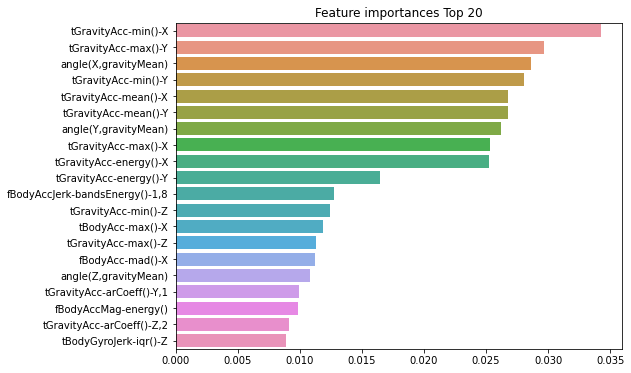

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_importances = rf1.feature_importances_
feature_importances = pd.Series(feature_importances,index=X_train.columns)
feature_top20 = feature_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=feature_top20 , y = feature_top20.index)
plt.show()

# **Gradient Boosting Machine**

In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/머신러닝/4장/Decision_Tree

/content/drive/MyDrive/Colab Notebooks/머신러닝/4장/Decision_Tree


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

X_train = df1.drop('Activity', axis = 1, inplace = False)
Y_train = df1['Activity']

X_test = df2.drop('Activity', axis = 1, inplace = False)
Y_test = df2['Activity']

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train , Y_train)
pred = gb.predict(X_test)
acc = accuracy_score(Y_test, pred)

print('Acc : ',acc) # GMB은 학습시간이 너무 오래 걸려서 hyperparameter tuning이 어려움

In [ ]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators':[100, 500],
#     'learning_rate' : [ 0.05, 0.1]
# }
# grid_cv = GridSearchCV(gb , param_grid=params , cv=2 ,verbose=1)
# grid_cv.fit(X_train , Y_train)
# print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
# print('최고 예측 정확도: {0}'.format(grid_cv.best_score_))